<font color='darkblue'>
### Student: Chen Weiyi, weiyi.alan.chen@gmail.com

# MTH9879 Homework 10

Assigned: April 28, 2015.
Due: May 12, 2015 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Yu Gan (yugan323@gmail.com), Fubo Shi (fubo.shi.baruch@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TAs Yu Gan and/or Fubo Shi.


### Set up R environment

In [1]:
%load_ext rpy2.ipython

## Numerical solution of Fredholm equation

### 1. (12 points)
Consider the Fredholm equation (7) in Lecture 10:

$$
\int_0^T{G}(|t-s|)\,dx_s =\text{const.}\qquad\text{for all $t\in [0,T]$.}
$$

Define $t_i:={i}\frac T{N}$. One way to discretize this integral equation is as follows:

$$
\sum_{j=1}^N G_{ij}\,v_j=\text{const.}
$$

where $v_j=x_{t_{j}}-x_{t_{j-1}}$ and

<a name="eq:1"></a>(1)
$$
G_{ij}=
\int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt.
$$

(a) Derive an explicit expression for the $G_{ij}$ in the case
$$
G(\tau)=\frac {1}{(1+\tau)^2}.
$$
You will need to compute separate expressions for the cases $i \neq j$ and $i=j$.

(b) With $N=512$, use matrix algebra to solve equation [(1)](#eq:1) numerically with this decay kernel.

(c) Plot your results - you should end up with something like the top figure in Figure 2 of Lecture 10.



<font color='darkblue'>

### Solution
**(a)** When $i < j$ , substitute the expression of $G(\tau)$ to 

$$
G_{ij} = \int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt.
$$

we derive

\begin{equation}
G_{ij} = \int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,\frac{1}{(1+s-t)^2}\,ds\,dt 
= \ln\left(\frac{1+t_{j-1}-t_{i-1}}{1+t_{j-1}-t_i} \cdot \frac{1+t_j-t_i}{1+t_j-t_{i-1}} \right)
\end{equation}

guaranteed positive inside $\ln$, similarly when $i > j$,

\begin{equation}
G_{ij} = \ln\left(\frac{1+t_{i-1}-t_{j-1}}{1+t_{i-1}-t_j} \cdot \frac{1+t_i-t_j}{1+t_i-t_{j-1}}\right)
\end{equation}

When $i = j$, we need to separate the inner integral: 

\begin{equation}
G_{ij} = \int_{t_{i-1}}^{t_i}\,\int_{t_{i-1}}^{t}\,\frac{1}{(1+t-s)^2}\,ds\,dt + \int_{t_{i-1}}^{t_i}\,\int_{t}^{t_i}\,\frac{1}{(1+s-t)^2}\,ds\,dt = 2(t_i-t_{i-1}) - 2\ln(1+t_i-t_{i-1})
\end{equation}

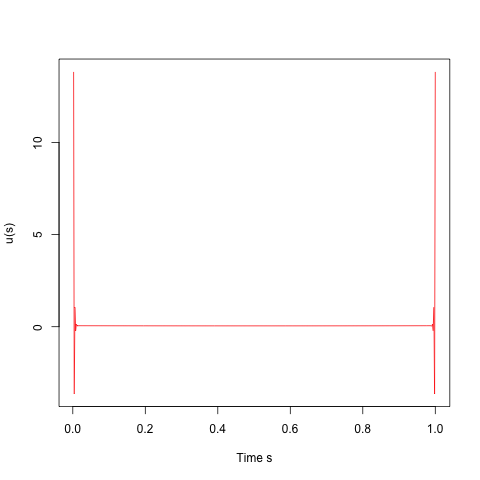

In [2]:
%%R

# (b) With N=512, use matrix algebra to solve equation (1) numerically with this decay kernel.

N <- 512

G <- function(i,j,dt){
    # function to calculate G_ij
    if (i == j) {
        return(2*dt - 2*log(1 + dt))
    } 
    else if (i > j) {
        return(log((1+(i-j)*dt)*(1+(i-j)*dt) / ((1+(i-j-1)*dt)*(1+(i-j+1)*dt))))
    }
    else {
        return(log((1+(j-i)*dt)*(1+(j-i)*dt) / ((1+(j-i-1)*dt)*(1+(j-i+1)*dt))))
    }
}

# To solve equation (1), we need to construct mat_G and ls_const
vec_const = rep(1/10000,N)
mat_G = matrix(0,N,N)
for (i in 1:N) {
    for (j in 1:N) {
        mat_G[i,j] = G(i,j,1/N)    
    }
}

# Solve
vec_v = solve(mat_G) %*% vec_const

# (c) Plot your results 
plot(seq(1/N, 1, 1/N), vec_v, type = "l", col = "red", xlab = "Time s", ylab = "u(s)")

## Optimal interval VWAP strategy in the square-root model

### 2. (12 points)

Consider equation (11) of Lecture 10 for the cost of liquidation using interval VWAPs:

$$
\cC=\sum_{j=1}^m\,C_{jj}+\sum_{i< j}^m\,C_{ji}.
$$

(a) With $m=3$ (that is 3 interval VWAP slices), and assuming the square-root process where

$$
h(v)=\frac  3 4 \sigma\,\sqrt{\frac{v}{V}} =\frac  3 4 \sigma\,\sqrt{\frac{\dot x}{V}}, 
\quad \mbox{ and } \quad
G(\tau)=1/\sqrt{\tau},
$$

compute explicit expressions for the matrix elements $C_{ji}$ in terms of $x_1$, $x_2$, $t_1$, and $t_2$ (noting that $t_0=0$ and $t_3=T$).

(b) Minimize the resulting expression for the expected cost of liquidation numerically to find optimal choices of $x_1$ and $x_2$ when $t_1=T/3$, and $t_2=2 \,T/3$.

(c) What is the percentage saving from trading with the 3-slice strategy relative to a VWAP?

(d) Explain to your non-mathematical manager why this strategy has lower expected cost.

<font color='darkblue'>

#### Solution
**(a)** According to the lecture notes,

\begin{equation}
C_{ii}=\frac{x_i}{t_{i}-t_{i-1}}\,h(v_i)\,\int_{t_{i-1}}^{t_i}\,dt\,\int_{t_{i-1}}^{t}\,\frac{1}{\sqrt{t-s}}\,ds=
\frac{4}{3}\,x_i\,h(v_i)\,\sqrt{t_i-t_{i-1}} = \frac{\sigma}{\sqrt{V}} x_i^{3/2}
\end{equation}

and

\begin{eqnarray*}
C_{ji}&=&\frac{x_j}{t_{j}-t_{j-1}}\,h(v_i)\,\int_{t_{j-1}}^{t_j}\,dt\,\int_{t_{i-1}}^{t_i}\,\frac{1}{\sqrt{t-s}}\,ds\\&=&
\frac{4}{3}\,x_j\,h(v_i)\,\frac{\left(t_{j}-t_{i-1}\right)^{3/2}
-\left(t_{j}-t_{i}\right)^{3/2}
-\left(t_{j-1}-t_{i-1}\right)^{3/2}
+\left(t_{j-1}-t_{i}\right)^{3/2}
}{t_{j}-t_{j-1}}\\&=&
\frac{\sigma}{\sqrt{V}}x_j\sqrt{x_i}\,\frac{\left(t_{j}-t_{i-1}\right)^{3/2} - \left(t_{j}-t_{i}\right)^{3/2} - \left(t_{j-1}-t_{i-1}\right)^{3/2} + \left(t_{j-1}-t_{i}\right)^{3/2} }{(t_{j}-t_{j-1})\sqrt{t_{i}-t_{i-1}}}
\end{eqnarray*}

**(b)** When $t_1=T/3$, and $t_2=2 \,T/3$:

\begin{eqnarray}
C_{11} &=& \frac{\sigma}{\sqrt{V}} x_1^{3/2} \\
C_{21} &=& (2\sqrt{2}-2)\frac{\sigma}{\sqrt{V}}x_2\sqrt{x_1}\\
C_{22} &=& \frac{\sigma}{\sqrt{V}} x_2^{3/2} \\
C_{31} &=& (3\sqrt{3}-4\sqrt{2}+1)\frac{\sigma}{\sqrt{V}}x_3\sqrt{x_1}\\
C_{32} &=& (2\sqrt{2}-2)\frac{\sigma}{\sqrt{V}}x_3\sqrt{x_2}\\
C_{33} &=& \frac{\sigma}{\sqrt{V}} x_3^{3/2} \\
\end{eqnarray}

In [3]:
%%R

cost <- function (x){
    # @summary: cost function
    # @param c11, c22, c33: cost parameters for i=j
    # @param c21, c32, c31: cost parameters for i<j
    c11 = x[1]^1.5
    c22 = x[2]^1.5
    c33 = (10000 - x[1] - x[2])^1.5
    c21 = (2*sqrt(2)-2) * x[2] * sqrt(x[1])
    c32 = (2*sqrt(2)-2) * (10000 - x[1] - x[2]) * sqrt(x[2])
    c31 = (3*sqrt(3)-4*sqrt(2)+1) * (10000 - x[1] - x[2]) * sqrt(x[1])
    return (c11 + c22 + c33 + c21 + c32 + c31)
}

# Optimization
optim(c(2000,2000), cost)

$par
[1] 6.471808e+03 5.276104e-09

$value
[1] 883282.3

$counts
function gradient 
     249       NA 

$convergence
[1] 0

$message
NULL



<font color='darkblue'>Therefore, the distrubtion of total shares at three layers should be 64.72%, 0% and 35.28% respectively.

<font color='darkblue'>
**(c)**

In [5]:
%%R

# What is the percentage saving from trading with the 3-slice strategy relative to a VWAP?

cost_vwap = 10000*sqrt(10000)
cost_3layer = cost(c(6472,0))
print((cost_vwap-cost_3layer)/cost_vwap*100)

[1] 11.67179


<font color='darkblue'>

The percentage saving from trading with the 3-slice strategy relative to a VWAP is 11.67%.

**(d)** This strategy has lower expected cost is mainly because there exists a temporary component in the market impact. 

Tranditionally, we sell all shares continuously then the market impact will be accumelated when time goes by. But in this strategy, there is a cool-down / wait for the market impact between selling different layers, then the expected cost in slippage will lower.